In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
!pip install pandas

     --------------------------------------- 11.3/11.3 MB 29.7 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install matplotlib

     ---------------------------------------- 8.1/8.1 MB 17.9 MB/s eta 0:00:00
     ------------------------------------- 225.2/225.2 kB 14.3 MB/s eta 0:00:00
     ---------------------------------------- 2.3/2.3 MB 36.0 MB/s eta 0:00:00
     ---------------------------------------- 73.8/73.8 kB ? eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 44.7 MB/s eta 0:00:00
     ---------------------------------------- 113.9/113.9 kB ? eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install networkx

     ---------------------------------------- 2.0/2.0 MB 7.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#Defino los archivos a usar
excel_conectividad=r"C:\Users\V304-16\Documents\GitHub\Neurociencias-2026-1\S03_datasets\EEG.xlsx"
excel_coordenadas=r"C:\Users\V304-16\Documents\GitHub\Neurociencias-2026-1\S03_datasets\EEG_3D_coordinates.xlsx"

In [4]:
# Leo los archivos de excel, como diccionarios
conectividad_dict=pd.read_excel(excel_conectividad,sheet_name=None)
coordenadas_dict=pd.read_excel(excel_coordenadas, sheet_name=None)

In [5]:
# Especifico cual hoja de excel voy aleer, posición 0
motor_df= conectividad_dict[list(conectividad_dict.keys())[0]]
coordenadas_df=coordenadas_dict[list(coordenadas_dict.keys())[0]]

In [6]:
#Redefino el indice para que sea más fácil convertirlo a grafo
motor_df.set_index('Unnamed: 0', inplace=True, drop=True)
coordenadas_df.set_index('Canal', inplace=True, drop=True)


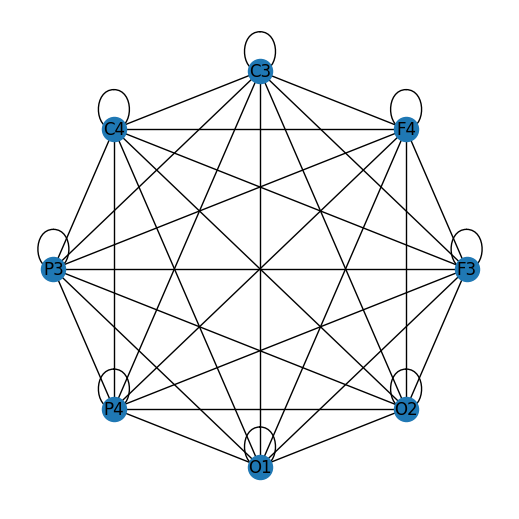

In [7]:
#Dibujemos el grafo
plt.figure(figsize=(5,5))
G=nx.from_pandas_adjacency(motor_df)
nx.draw_circular(G,with_labels=True)
plt.show()

In [8]:
# Crear un diccionario de las posiciones
pos2D={canal:(coordenadas_df.loc[canal,'x'],
             coordenadas_df.loc[canal,'y']) for canal in coordenadas_df.index}

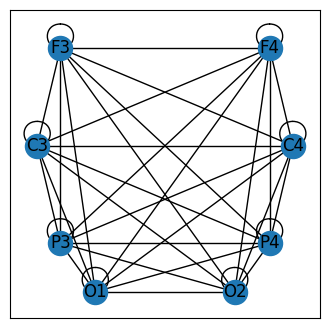

In [9]:
plt.figure(figsize=(4,4))
nx.draw_networkx(G, pos=pos2D)

In [10]:
#Crear el plot 3D del grafo
pos3D={canal:(coordenadas_df.loc[canal,'x'],
             coordenadas_df.loc[canal,'y'],
             coordenadas_df.loc[canal,'z']) for canal in coordenadas_df.index}

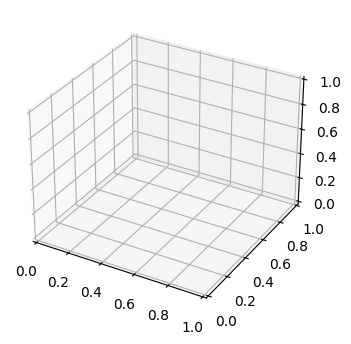

In [11]:
fig= plt.figure(figsize=(4,4))
ax= fig.add_subplot(111, projection='3d')

In [15]:
#Dibujar los nodos en 3D
for canal, (x,y,z) in pos3D.items():
    ax.scatter(x,y,z)
    ax.text(x,y,z+0.03,canal,fontsize=10, ha='center')


In [24]:
for i,j, data in G.edges(data=True):
    x=[pos3D[i][0],pos3D[j][0]]
    y=[pos3D[i][1],pos3D[j][1]]
    z=[pos3D[i][2],pos3D[j][2]]
    ax.plot(x,y,z,linewidth=data['weight']*5)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Red de conectividad EEG(3D)')
plt.show()

AttributeError: 'Axes' object has no attribute 'set_zlabel'

In [19]:
# Crear mapa de color
import seaborn as sns

In [18]:
!pip install seaborn

     -------------------------------------- 294.9/294.9 kB 2.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


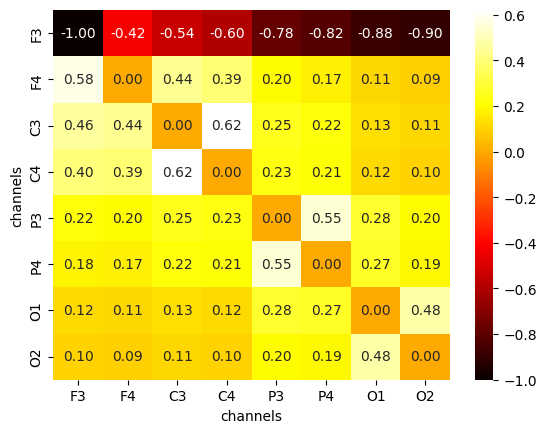

In [31]:
ax=sns.heatmap(motor_df.values-np.eye(len(motor_df),1),annot=True,
              cmap='hot', fmt='.2f',
              xticklabels=motor_df.columns, yticklabels=motor_df.columns)
ax.set(xlabel='channels',ylabel='channels')
plt.show()

In [ ]:
# operación de numpy o que se tenga que modificar en la diagonal salga 0